# aSPEM Experiment : analysis




In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import scipy as sc
from scipy import stats

In [2]:
!ls data/

enregistrement_BMC_2017-09-26_095637.asc
enregistrement_BMC_2017-09-26_095637.EDF
enregistrement_BMC_2017-09-26_095637.pkl
enregistrement_DC_2017-09-27_161040.asc
enregistrement_DC_2017-09-27_161040.edf
enregistrement_DC_2017-09-27_161040.pkl
enregistrement_IP_2017-09-28_115250.asc
enregistrement_IP_2017-09-28_115250.edf
enregistrement_IP_2017-09-28_115250.pkl
enregistrement_LB_2017-09-20_151043 (1).asc
enregistrement_LB_2017-09-20_151043.asc
enregistrement_LB_2017-09-20_151043.edf
enregistrement_LB_2017-09-20_151043.pkl
pari_BMC_2017-09-25_142503.pkl
pari_CS_2017-09-28_154353.pkl
pari_DC_2017-09-26_162348.pkl
pari_FM_2017-09-26_143606.pkl
pari_IP_2017-09-26_122431.pkl
pari_LB_2017-09-19_152205.pkl


In [3]:
%matplotlib inline
fig_width = 12

from aSPEM import aSPEM

In [4]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    print(a)

['pari', 'FM', '2017-09-26', '143606']
['pari', 'LB', '2017-09-19', '152205']
['enregistrement', 'LB', '2017-09-20', '151043']
['pari', 'DC', '2017-09-26', '162348']
['pari', 'IP', '2017-09-26', '122431']
['pari', 'BMC', '2017-09-25', '142503']
['enregistrement', 'IP', '2017-09-28', '115250']
['enregistrement', 'BMC', '2017-09-26', '095637']
['pari', 'CS', '2017-09-28', '154353']
['enregistrement', 'DC', '2017-09-27', '161040']


In [5]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['FM','LB', 'DC', 'IP', 'BMC'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)


 FM 2017-09-26_143606 = black
stim_tau = 0.75     Vitesse (deg/s) = 15.0
block 1 = (0.41408659641630347, 1.0931334366842138e-09)
         1 : p = 0.647523519824 --> 0.483773584906 ( +/- 0.187809883951 )
         2 : p = 0.159515642516 --> 0.425142857143 ( +/- 0.136137985222 )
         3 : p = 0.700809315349 --> 0.535333333333 ( +/- 0.236632391884 )
         4 : p = 0.363458203853 --> 0.487045454545 ( +/- 0.0604652246207 )
         5 : p = 0.0216407145976 --> 0.273055555556 ( +/- 0.221771939636 )
         6 : p = 0.770964181565 --> 0.6175 ( +/- 0.31869572367 )
         7 : p = 0.17987589782 --> 0.473571428571 ( +/- 0.191772079856 )
block 2 = (0.75731605517661194, 1.703660943557528e-38)
         1 : p = 0.309087453462 --> 0.527307692308 ( +/- 0.150813376582 )
         2 : p = 0.0239682943655 --> 0.119259259259 ( +/- 0.203895868956 )
         3 : p = 0.986124321066 --> 0.901315789474 ( +/- 0.224785524125 )
         4 : p = 0.0102498711568 --> 0.0578260869565 ( +/- 0.211823481101 )
      

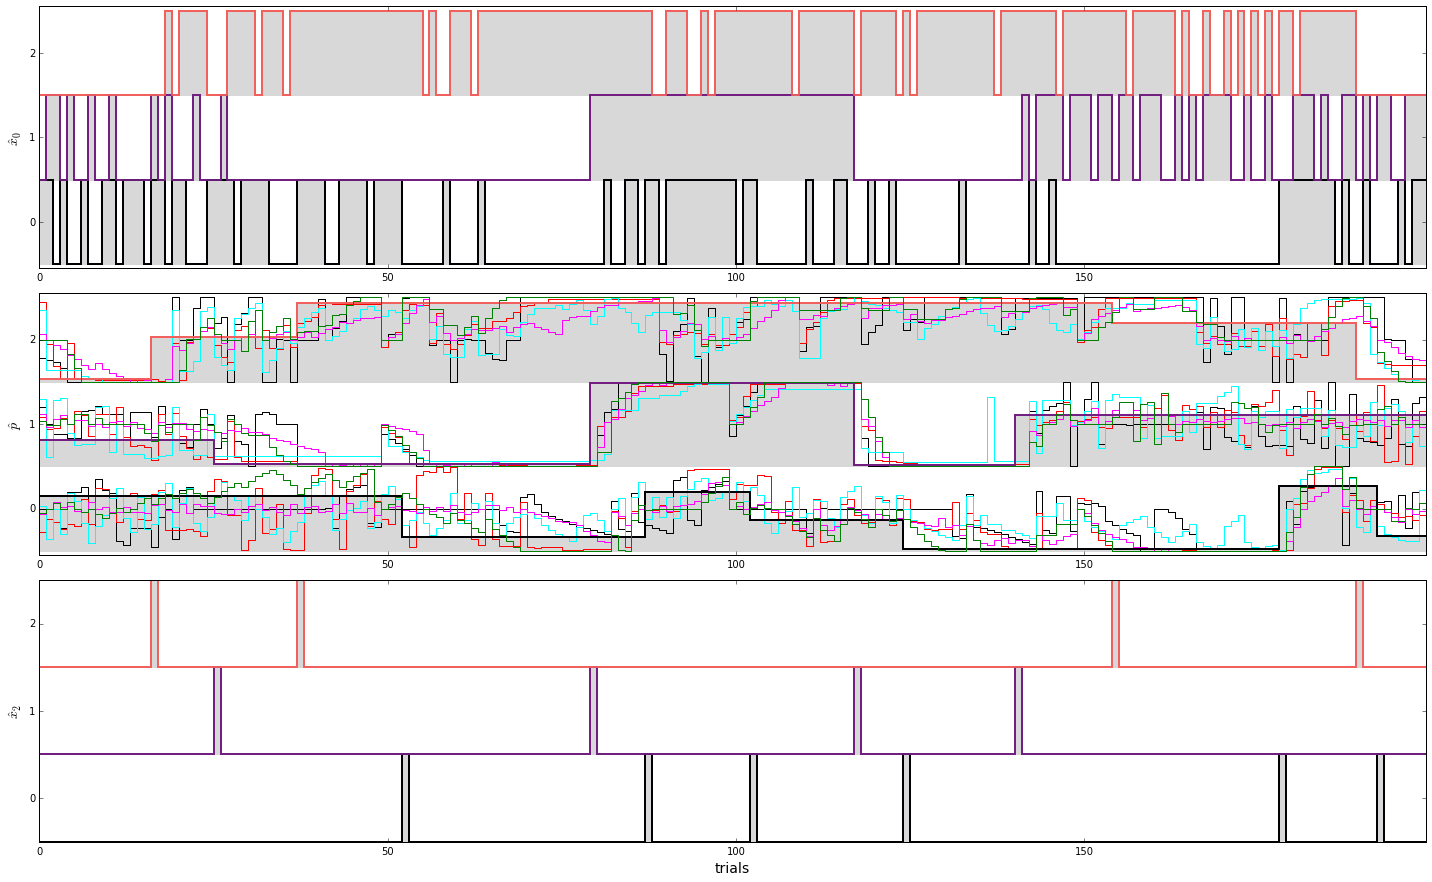

In [6]:
fig_width = 20
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/(1.6180)))
        
mean = []
std = []

for x, color in enumerate(['black', 'red', 'cyan', 'magenta', 'green']):
        
    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    stick = np.zeros_like(p)
    stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
    corrects = 0

    for i_layer, label in enumerate([r'$\^x_0$', r'$\^p$', r'$\^x_2$']):
        axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_blocks+1)]))
        _ = axs[i_layer].step(range(N_trials), p[:, :, i_layer]+stick[:, :, i_layer], lw=2, alpha=.9)
        for i_block in range(N_blocks):
            _ = axs[i_layer].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.03, facecolor='black', step='pre')
            #_ = axs[i_layer].fill_between(range(N_trials), i_block + np.ones_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.1, facecolor='red', step='pre')
        axs[i_layer].axis('tight')
        axs[i_layer].set_yticks(np.arange(N_blocks)+.5)
        axs[i_layer].set_yticklabels(np.arange(N_blocks) )
        axs[i_layer].set_ylabel(label, fontsize=14)
        
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    print('\n', exp[x]['observer'], exp[x]['timeStr'], '=',color )
    print ('stim_tau =', exp[x]['stim_tau'], '    Vitesse (deg/s) =', exp[x]['V_X']/exp[x]['px_per_deg'])

    mean_block = []
    std_block = []
    proba_switch = []
    
    for block in range(N_blocks):
        mean_switch = []
        std_switch = []
        _ = axs[1].step(range(N_trials), block + results[:, block],  color=color, lw=1, label=exp[x]['observer'])
        print('block', block+1, '=', sc.stats.pearsonr(p[:, block, 1], results[:,block]))
                
        switch = [0]
        p_switch = [p[0, block, 1]]
        for s in range(N_trials):
            if p[s, block, 2]==1 :
                switch.append(s)
                p_switch.append(p[s, block, 1])
        switch.append(N_trials)
        
        proba_switch.append(p_switch)
        
        for s1 in range(len(switch)-1) :
            mean_s1 = np.mean(results[switch[s1]:switch[s1+1],block])
            std_s1 = np.std(results[switch[s1]:switch[s1+1],block])
            print('        ',s1+1, ': p =', p_switch[s1] , '-->', mean_s1, '( +/-', std_s1, ')')
        
            mean_switch.append(mean_s1)
            std_switch.append(std_s1)
        
        mean_block.append(mean_switch)
        std_block.append(std_switch)

    mean.append(mean_block)
    std.append(std_block)
    
    fig.tight_layout()
    for i in range(2): axs[i].set_ylim(-.05, N_blocks + .05)
    axs[-1].set_xlabel('trials', fontsize=14)


plt.show()

In [7]:
moyenne = []
ecart_type = []
for block in range(len(mean[0])) :
    moyenne_switch_block = []
    std_switch_block = []
    
    print('block ', block)
    for switch in range(len(mean[0][block])):
        liste_moyenne = []
        liste_std = []
        for sujet in range(len(mean)) :
            liste_moyenne.append(mean[sujet][block][switch])
            liste_std.append(std[sujet][block][switch])
            #print (sujet, block, switch, '-->', mean[sujet][block][switch])
        moyenne_switch_block.append(np.mean(liste_moyenne))
        std_switch_block.append(np.mean(liste_std))
        
        print('        ',switch+1, ': p =', proba_switch[block][switch] , '-->', np.mean(liste_moyenne), '( +/-', np.mean(liste_std),')')
        
    moyenne.append(moyenne_switch_block)
    ecart_type.append(std_switch_block)

block  0
         1 : p = 0.647523519824 --> 0.514150943396 ( +/- 0.172441130927 )
         2 : p = 0.159515642516 --> 0.350228571429 ( +/- 0.195452841124 )
         3 : p = 0.700809315349 --> 0.6092 ( +/- 0.166749801002 )
         4 : p = 0.363458203853 --> 0.446545454545 ( +/- 0.13966992638 )
         5 : p = 0.0216407145976 --> 0.179240740741 ( +/- 0.162578615899 )
         6 : p = 0.770964181565 --> 0.610357142857 ( +/- 0.295989437056 )
         7 : p = 0.17987589782 --> 0.414142857143 ( +/- 0.115352948109 )
block  1
         1 : p = 0.309087453462 --> 0.456961538462 ( +/- 0.146429909929 )
         2 : p = 0.0239682943655 --> 0.1125 ( +/- 0.146690536416 )
         3 : p = 0.986124321066 --> 0.852736842105 ( +/- 0.233461020307 )
         4 : p = 0.0102498711568 --> 0.111739130435 ( +/- 0.236679594251 )
         5 : p = 0.6131806477 --> 0.51606779661 ( +/- 0.195721583083 )
block  2
         1 : p = 0.033071304189 --> 0.162058823529 ( +/- 0.208966918655 )
         2 : p = 0.5339458819